In [1]:
import pandas as pd
import sagemaker

In [18]:
data = pd.read_csv("../Data/fewer_labeled_rows_by_block.csv")

In [9]:
import boto3
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri

sess = sagemaker.Session()
role = get_execution_role()
container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split

def create_training_sets(data):
    ys = np.array(data["Target"]).astype("float32")
    
    ys -= 1
        
    drop_list = ["Target", "Date", "Primary Type"]
    
    xs = np.array(data.drop(drop_list, axis=1)).astype("float32")
    
    np.random.seed(0)

    train_features, test_features, train_labels, test_labels = train_test_split(
    xs, ys, test_size=0.2)
    
    val_features, test_features, val_labels, test_labels = train_test_split(
    test_features, test_labels, test_size=0.5)
    
    return train_features, test_features, train_labels, test_labels, val_features, val_labels
     
    
train_features, test_features, train_labels, test_labels, val_features, val_labels = create_training_sets(data)

In [55]:
train_features

array([[83.333336,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [13.333333,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [86.125   ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [41.444443,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [34.666668,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [77.888885,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [38]:
import sagemaker
from sagemaker.amazon.amazon_estimator import RecordSet
import boto3

# instantiate the LinearLearner estimator object
multiclass_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.4xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=6)

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-670355705955


In [56]:
train_records = multiclass_estimator.record_set(train_features, train_labels, channel='train')
val_records = multiclass_estimator.record_set(val_features, val_labels, channel='validation')
test_records = multiclass_estimator.record_set(test_features, test_labels, channel='test')

In [40]:
multiclass_estimator.fit([train_records, val_records, test_records])

INFO:sagemaker:Creating training-job with name: linear-learner-2018-10-23-15-29-37-619


2018-10-23 15:29:37 Starting - Starting the training job...
2018-10-23 15:29:38 Starting - Launching requested ML instances.........
2018-10-23 15:31:13 Starting - Preparing the instances for training...
2018-10-23 15:31:49 Downloading - Downloading input data
2018-10-23 15:31:49 Training - Downloading the training image..
Docker entrypoint called with argument(s): train
[10/23/2018 15:32:22 INFO 140403311732544] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01', u'lr_scheduler_minimum_lr': u'auto', u'target_recall': u'0.8', u'n

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9423221153846154, "sum": 0.9423221153846154, "min": 0.9423221153846154}}, "EndTime": 1540308757.756117, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1540308757.756018}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 1.1242401263897235, "sum": 1.1242401263897235, "min": 1.1242401263897235}}, "EndTime": 1540308757.75623, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1540308757.756211}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 1.7822646155724158, "sum": 1.7822646155724158, "min": 1.7822646155724158}}, "EndTime": 1540308757.756288, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 4}, "StartTime": 1540

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 0.9064829618013822, "sum": 0.9064829618013822, "min": 0.9064829618013822}}, "EndTime": 1540308763.234923, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1540308763.234855}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 1.124215111365685, "sum": 1.124215111365685, "min": 1.124215111365685}}, "EndTime": 1540308763.235014, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 1540308763.234994}

#metrics {"Metrics": {"train_multiclass_cross_entropy_objective": {"count": 1, "max": 1.7248061664287861, "sum": 1.7248061664287861, "min": 1.7248061664287861}}, "EndTime": 1540308763.235073, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 6}, "StartTime": 154030


2018-10-23 15:32:58 Uploading - Uploading generated training model
2018-10-23 15:32:58 Completed - Training job completed
Billable seconds: 78


In [41]:
multiclass_predictor = multiclass_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2018-10-23-16-18-14-148
INFO:sagemaker:Creating endpoint with name linear-learner-2018-10-23-15-29-37-619


---------------------------------------------------------------!

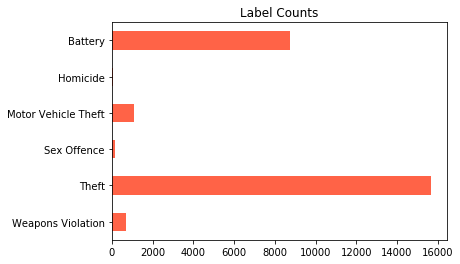

In [46]:
%matplotlib inline

# assign label names and count label frequencies
label_map = {0:'Sex Offence', 1:'Homicide', 2:'Motor Vehicle Theft', 3:'Weapons Violation', 
             4:'Battery', 5:'Theft'}
label_counts = pd.DataFrame(data=train_labels)[0].map(label_map).value_counts(sort=False).sort_index(ascending=False)
label_counts.plot('barh', color='tomato', title='Label Counts')

In [57]:
import seaborn as sns


def evaluate_metrics(predictor, test_features, test_labels):
    """
    Evaluate a model on a test set using the given prediction endpoint. Display classification metrics.
    """
    # split the test dataset into 100 batches and evaluate using prediction endpoint
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(test_features, 100)]

    # parse protobuf responses to extract predicted labels
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    test_preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    test_preds = test_preds.reshape((-1,))
    
    # calculate accuracy
    accuracy = (test_preds == test_labels).sum() / test_labels.shape[0]
    
    # calculate recall for each class
    recall_per_class, classes = [], []
    for target_label in np.unique(test_labels):
        recall_numerator = np.logical_and(test_preds == target_label, test_labels == target_label).sum()
        recall_denominator = (test_labels == target_label).sum()
        recall_per_class.append(recall_numerator / recall_denominator)
        classes.append(label_map[target_label])
    recall = pd.DataFrame({'recall': recall_per_class, 'class_label': classes})
    recall.sort_values('class_label', ascending=False, inplace=True)

    # calculate confusion matrix
    label_mapper = np.vectorize(lambda x: label_map[x])
    confusion_matrix = pd.crosstab(label_mapper(test_labels), label_mapper(test_preds), 
                                   rownames=['Actuals'], colnames=['Predictions'], normalize='index')

    # display results
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')  
    ax = recall.plot(kind='barh', x='class_label', y='recall', color='steelblue', title='Recall', legend=False)
    ax.set_ylabel('')
    print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.707


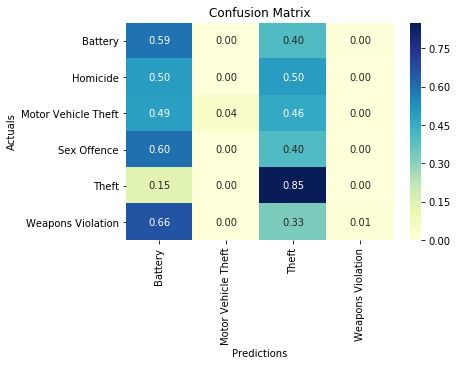

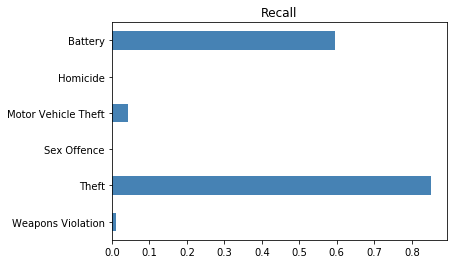

In [58]:
evaluate_metrics(multiclass_predictor, test_features, test_labels)

INFO:sagemaker:Created S3 bucket: sagemaker-us-east-1-670355705955
INFO:sagemaker:Creating training-job with name: linear-learner-2018-10-23-16-47-29-308


2018-10-23 16:47:29 Starting - Starting the training job...
2018-10-23 16:47:32 Starting - Launching requested ML instances......
2018-10-23 16:48:39 Starting - Preparing the instances for training.........
2018-10-23 16:50:12 Downloading - Downloading input data...
2018-10-23 16:50:50 Training - Training image download completed. Training in progress.
Docker entrypoint called with argument(s): train
[10/23/2018 16:50:51 INFO 140132949698368] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01', u'lr_scheduler_minimum_lr': u'auto',

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.05789164176354041, "sum": 0.05789164176354041, "min": 0.05789164176354041}}, "EndTime": 1540313460.573204, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 1540313460.573108}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.06622341860257662, "sum": 0.06622341860257662, "min": 0.06622341860257662}}, "EndTime": 1540313460.573306, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 1540313460.573285}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.08312554388779861, "sum": 0.08312554388779861, "min": 0.08312554388779861}}, "EndTime": 1540313460.573368, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 1}, "StartTime": 154

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.05546385721059946, "sum": 0.05546385721059946, "min": 0.05546385721059946}}, "EndTime": 1540313468.364112, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1540313468.364021}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.06622050593449519, "sum": 0.06622050593449519, "min": 0.06622050593449519}}, "EndTime": 1540313468.364205, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1540313468.36419}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.08471388097909781, "sum": 0.08471388097909781, "min": 0.08471388097909781}}, "EndTime": 1540313468.364261, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 3}, "StartTime": 1540

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.054196047856257513, "sum": 0.054196047856257513, "min": 0.054196047856257513}}, "EndTime": 1540313476.163735, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 1540313476.163655}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.06626872297433706, "sum": 0.06626872297433706, "min": 0.06626872297433706}}, "EndTime": 1540313476.163863, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 1540313476.163841}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.08418273456280048, "sum": 0.08418273456280048, "min": 0.08418273456280048}}, "EndTime": 1540313476.164154, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 5}, "StartTime": 

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.05182401965214656, "sum": 0.05182401965214656, "min": 0.05182401965214656}}, "EndTime": 1540313491.924507, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 9}, "StartTime": 1540313491.924411}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.06624701705345741, "sum": 0.06624701705345741, "min": 0.06624701705345741}}, "EndTime": 1540313491.924611, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 9}, "StartTime": 1540313491.924595}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.08030431409982534, "sum": 0.08030431409982534, "min": 0.08030431409982534}}, "EndTime": 1540313491.924671, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 9}, "StartTime": 154

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.05087651062011719, "sum": 0.05087651062011719, "min": 0.05087651062011719}}, "EndTime": 1540313499.709848, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 11}, "StartTime": 1540313499.709739}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.06611011930612418, "sum": 0.06611011930612418, "min": 0.06611011930612418}}, "EndTime": 1540313499.709965, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 11}, "StartTime": 1540313499.709947}

#metrics {"Metrics": {"train_weighted_softmax_loss_objective": {"count": 1, "max": 0.07892551847604605, "sum": 0.07892551847604605, "min": 0.07892551847604605}}, "EndTime": 1540313499.710022, "Dimensions": {"model": 2, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 11}, "StartTime": 


2018-10-23 16:51:52 Uploading - Uploading generated training model
2018-10-23 16:51:52 Completed - Training job completed


INFO:sagemaker:Creating model with name: linear-learner-2018-10-23-16-52-12-634


Billable seconds: 101


INFO:sagemaker:Creating endpoint with name linear-learner-2018-10-23-16-47-29-308


-----------------------------------------------------------------------------!Accuracy: 0.150


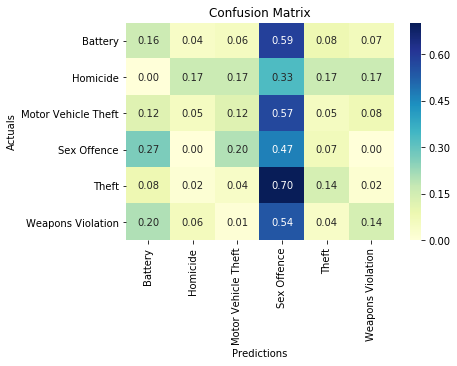

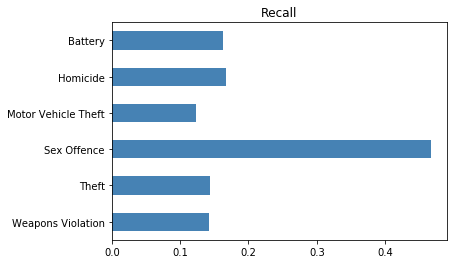

In [51]:
# instantiate the LinearLearner estimator object
balanced_multiclass_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                                        train_instance_count=1,
                                                        train_instance_type='ml.m4.xlarge',
                                                        predictor_type='multiclass_classifier',
                                                        num_classes=6,
                                                        balance_multiclass_weights=True)
# start a training job
balanced_multiclass_estimator.fit([train_records, val_records, test_records])

# deploy a model hosting endpoint
balanced_multiclass_predictor = balanced_multiclass_estimator.deploy(initial_instance_count=1, 
                                                                     instance_type='ml.m4.xlarge')

Accuracy: 0.150


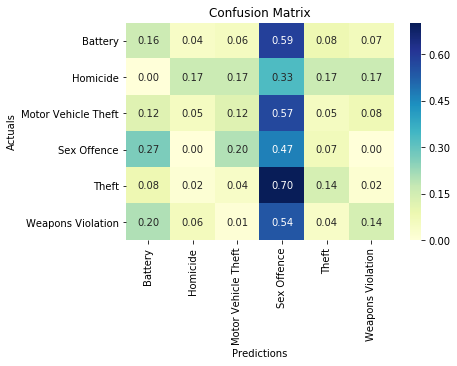

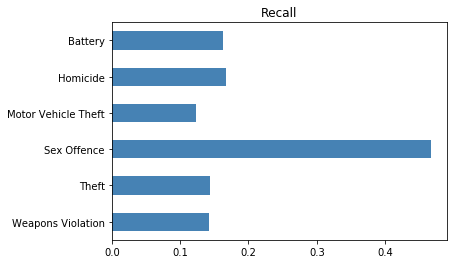

In [53]:
evaluate_metrics(balanced_multiclass_predictor, test_features, test_labels)

In [60]:
def get_predictions(predictor, test_features, test_labels):

    # split the test dataset into 100 batches and evaluate using prediction endpoint
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(test_features, 100)]

    # parse protobuf responses to extract predicted labels
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    test_preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    test_preds = test_preds.reshape((-1,))
    
    return test_preds

linear_preds = get_predictions(multiclass_predictor, test_features, test_labels)

balanced_preds = get_predictions(balanced_multiclass_predictor, test_features, test_labels)

In [1]:
# from sklearn.metrics import classification_report, roc_curve


# def get_one_class("theft", )

# # fpr_builtin, tpr_builtin, thresholds_builtin = roc_curve(test_labels, linear_preds)
# # fpr_five, tpr_five, thresholds_five = roc_curve(test_labels, balanced_preds)

In [ ]:
# fig, axes = plt.subplots(1,1, figsize=(9, 6))

# axes.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')

# axes.plot(fpr_builtin, tpr_builtin, label='Built-in')
# axes.plot(fpr_five, tpr_five, label='5:1')

# axes.spines['top'].set_visible(False)
# axes.spines['right'].set_visible(False)

# axes.legend()